1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset

In [2]:
data=pd.read_csv('extended_salary_data.csv')
data.head()

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78


Visualize the data using a scatter plot. Label the axes appropriately.

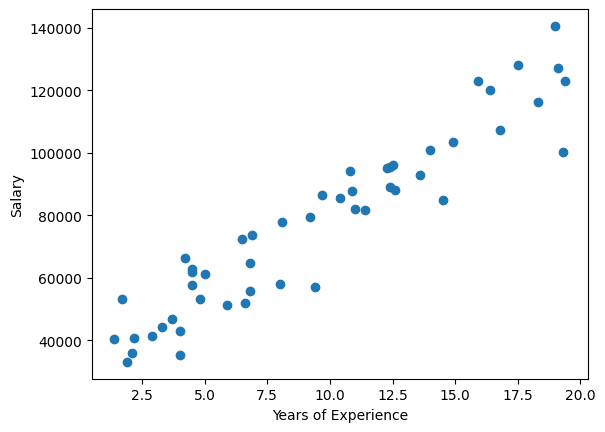

In [3]:
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(data['YearsExperience'],data['Salary'])
plt.show()

Compute basic statistics for each column (mean, median, variance, etc.)

In [4]:
stats=data.describe()
stats.loc['Variance']=data.var()
stats.loc['Median']=data.median()
print(stats)

          YearsExperience        Salary
count           50.000000  5.000000e+01
mean             9.480000  7.737055e+04
std              5.485491  2.829892e+04
min              1.400000  3.304880e+04
25%              4.500000  5.386188e+04
50%              9.300000  7.859865e+04
75%             13.350000  9.535622e+04
max             19.400000  1.406464e+05
Variance        30.090612  8.008291e+08
Median           9.300000  7.859865e+04


2. Build a Linear Regression Model

Split the data into training and testing sets (e.g., 80% for training, 20% for testing)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data[['YearsExperience']]
y=data['Salary']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

Train a linear regression model on the training set

In [6]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Obtain the coefficients of the linear model (slope and intercept).

In [7]:
print("Slope: ", lr.coef_[0])
print("Intercept: ", lr.intercept_)

Slope:  4854.184972065953
Intercept:  31387.443404060636


3. Evaluate the Model

Use the model to make predictions on the testing set

In [8]:
y_pred = lr.predict(x_test)

Calculate evaluation metrics:
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

MAE:  6836.210895894568
MSE:  79580620.27310547


Plot the regression line over the scatter plot of the data

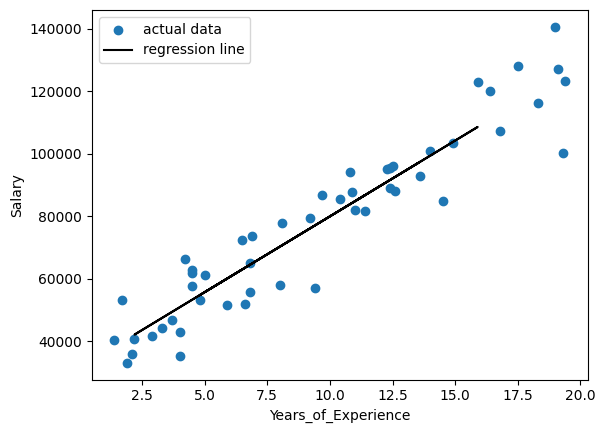

In [10]:
plt.scatter(data['YearsExperience'], data['Salary'],label='actual data')
plt.plot(x_test, y_pred, color='black', label='regression line')
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

Bonus Question

Add a new feature, `NumProjectsCompleted`, loosely correlated with `YearsExperience`

In [11]:
noise = np.random.randint(-3, 4, len(data)) 
data['NumProjectsCompleted'] = np.floor( 1.8*data['YearsExperience'] + noise )
data.head()

,YearsExperience,Salary,NumProjectsCompleted
0,8.1,77884.67,17.0
1,19.1,127213.68,33.0
2,14.9,103343.52,24.0
3,12.4,88988.96,24.0
4,4.0,35214.78,9.0


Train a multiple linear regression model with both features (`YearsExperience` and `NumProjectsCompleted`) as inputs and `Salary` as the target

In [12]:
x=data[['YearsExperience','NumProjectsCompleted']]
y=data['Salary']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

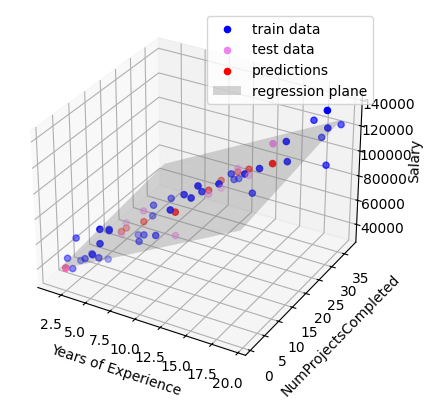

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure() 
ax=fig.add_subplot(111, projection='3d')  
ax.scatter(x_train['YearsExperience'], x_train['NumProjectsCompleted'], y_train, color='blue', label='train data') 
ax.scatter(x_test['YearsExperience'], x_test['NumProjectsCompleted'], y_test, color='violet', label='test data')  
ax.scatter(x_test['YearsExperience'], x_test['NumProjectsCompleted'], y_pred, color='red', label='predictions') 
xx, yy=np.meshgrid(np.linspace(x['YearsExperience'].min(), x['YearsExperience'].max(), 10), np.linspace(x['NumProjectsCompleted'].min(), x['NumProjectsCompleted'].max(), 10)) 
zz = lr.intercept_+lr.coef_[0] *xx+lr.coef_[1] *yy 
ax.plot_surface(xx, yy, zz, alpha=0.3, color='grey',label='regression plane') 
ax.set_xlabel('Years of Experience') 
ax.set_ylabel('NumProjectsCompleted') 
ax.set_zlabel('Salary')  
ax.legend() 
plt.show()

Evaluate the model using the same metrics (MAE, MSE)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

MAE:  6703.643854198528
MSE:  77939649.05611715
